# 邊界偵測 (Edge Detection)
通常在一張影像當中，我們會感興趣的地方會是亮度變化比較大的地方，因為這些地方可以被當作用來描述該影像的特徵，其中一種由亮度變化形成的特徵就是影像的邊界(edge)位置。

## 影像梯度 (Image gradient)
由於我們對影像有亮度變化的地方有興趣，因此需要一種數學描述這種變化，即為image gradient。

Image gradient是一2D向量(vector)，對應水平和垂直方向，方向定義為亮度最有可能增加的方向，簡單來說就是暗->亮，長度對應變化率。在影像中一點$(x,y)$的梯度可以表示為

$$\triangledown f = \begin{bmatrix}
\frac{\partial f}{\partial x}\\ 
\frac{\partial f}{\partial y}
\end{bmatrix} = \begin{bmatrix}
g_x\\ 
g_y\end{bmatrix}$$

方向為

$$\theta = \tan^{-1} \begin{bmatrix}
\frac{g_y}{g_x}
\end{bmatrix}$$

長度為

$$g = \sqrt{g_{x}^2+g_{y}^2}$$

## Sobel operator
Sobel operator或Sobel filter是一種常被用來計算影像梯度運算子，其方法為利用$3 \times 3$的kernel對影像作Convolution (摺積)。

假設$\mathbf{A}$為來源影像，$\mathbf{G_x}$與$\mathbf{G_y}$分別對應水平與垂直方向的梯度圖，代表來源影像中每一個點的梯度，則可以表示為

$$\mathbf{G_x}=\begin{bmatrix}
1 & 0 & -1\\ 
2 & 0 & -2\\ 
1 & 0 & -1
\end{bmatrix} \ast \mathbf{A} \text{ and } 
\mathbf{G_y}=\begin{bmatrix}
1 & 2 & 1\\ 
0 & 0 & 0\\ 
-1 & -2 & -1
\end{bmatrix} \ast \mathbf{A}$$

所以梯度的強度圖可以寫成

$$\mathbf{G} = \sqrt{\mathbf{G_x}^2 + \mathbf{G_y}^2}$$

同理梯度的方向圖可以寫成

$$\Theta = \tan^{-1} \begin{bmatrix}
\frac{\mathbf{G_y}}{\mathbf{G_x}}
\end{bmatrix}$$

## Canny edge detector
Canny edge detector是一種用來偵測影像中邊界的演算法，基本版的流程分為五個步驟：
1. 使用Gaussian filter平滑化影像，目的是為了降噪
2. 計算影像梯度的強度
3. 利用non-maximum suppression找出強邊界，比較每一個像素，只留下強度比相鄰像素的強度都強的像素
4. 應用double threshold分出強邊界與弱邊界，設定high threshold與low threshold，如果強度大於high threshold分為強邊界，若強度小於high threshold且大於low threshold分為弱邊界，其他則會被排除
5. 排除沒有跟強邊界相連的弱邊界

## 範例
scikit-image有實作Sobel filter與Canny edge detector，Sobel filter輸出為梯度強度影像，Canny edge detector輸出為二值影像，如下所示：

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/ndimage/measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


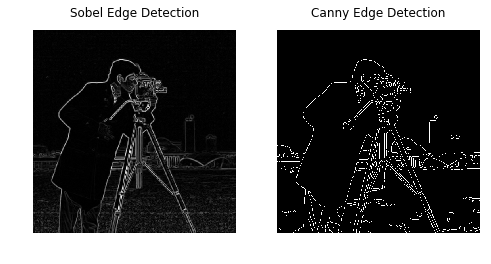

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filters import sobel
from skimage import feature

image = camera()

edge_sobel = sobel(image)
edge_canny = feature.canny(image, sigma=2.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

ax[0].imshow(edge_sobel, cmap=plt.cm.gray)
ax[0].set_title('Sobel Edge Detection', fontsize=12)
ax[0].axis('off')

ax[1].imshow(edge_canny, cmap=plt.cm.gray)
ax[1].set_title('Canny Edge Detection', fontsize=12)
ax[1].axis('off')

plt.show()

## 參考
[Edge operators](http://scikit-image.org/docs/dev/auto_examples/edges/plot_edge_filter.html#sphx-glr-auto-examples-edges-plot-edge-filter-py)
[Canny edge detector](http://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html#sphx-glr-auto-examples-edges-plot-canny-py)